In [61]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhadramohit/customer-shopping-latest-trends-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/bhadramohit/customer-shopping-latest-trends-dataset/versions/1


In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#Untuk Google Colab :
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/MyDrive/GoogleColab/shopping_trends.csv')
print(f'Shape of the data: {df.shape}')
df.head()

Mounted at /content/drive
Shape of the data: (3900, 19)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [65]:
df.duplicated().sum()

0

In [66]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [67]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


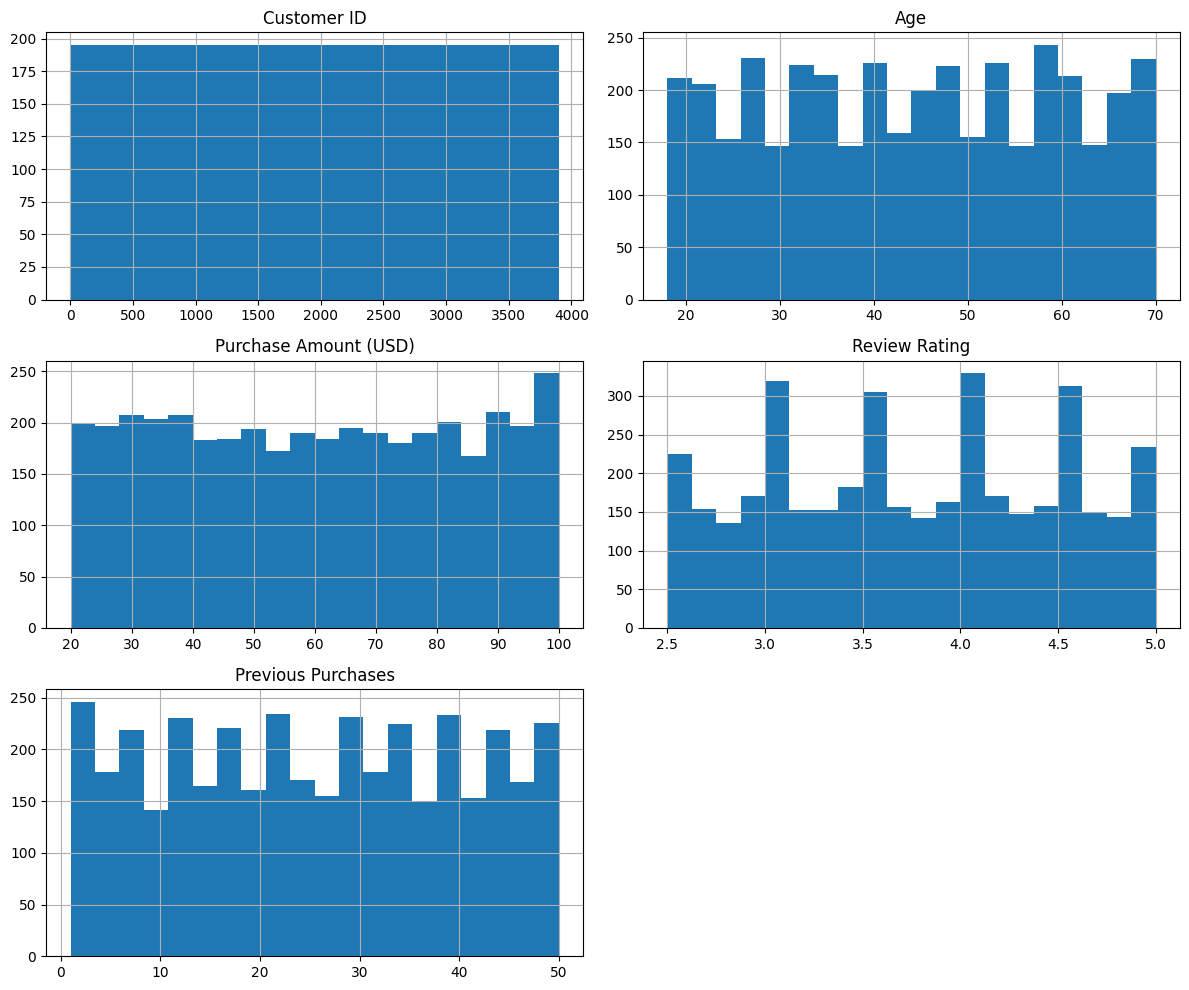

In [68]:
# Visualisasi distribusi kolom numerik penting
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

There are no missing values in the data

In [24]:
df.Gender.value_counts()

,count
Gender,
Male,2652
Female,1248


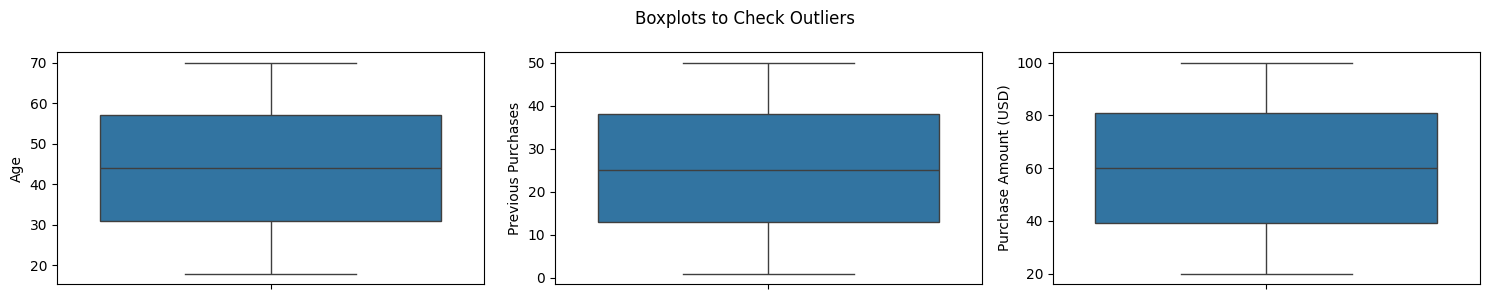

In [25]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Previous Purchases', 'Purchase Amount (USD)']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

Kesimpulan Umum:
**Age (Usia):**

Rentang usia antara 19-70 tahun, dengan nilai tengah sekitar 50 tahun.
Tidak ada outlier yang signifikan.

**Previous Purchases (Pembelian Sebelumnya):**
Rentang jumlah pembelian antara 1-50 transaksi, dengan median sekitar 25 transaksi.

**Purchase Amount (Jumlah Pembelian):**
Rentang jumlah pembelian antara $20-$100, dengan median sekitar $60.


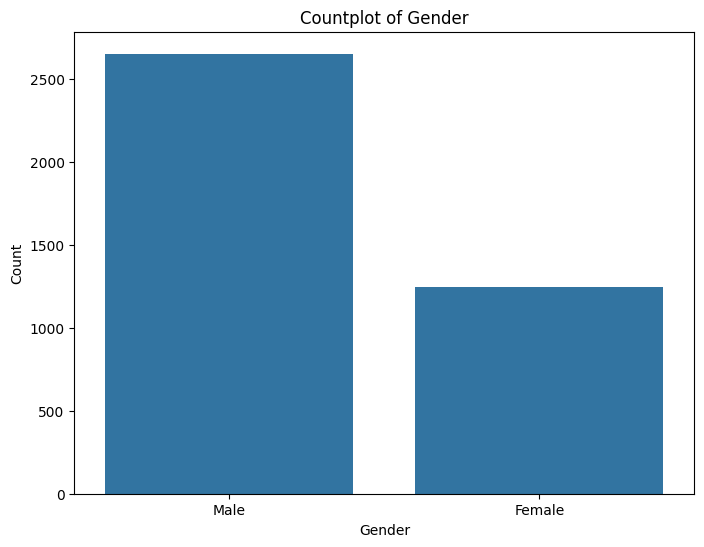

In [26]:
# Membuat countplot untuk variabel Gender
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
sns.countplot(x='Gender', data=df)  # Menggunakan countplot
plt.title('Countplot of Gender')  # Menambahkan judul
plt.xlabel('Gender')  # Menambahkan label sumbu x
plt.ylabel('Count')  # Menambahkan label sumbu y
plt.show()  # Menampilkan plot

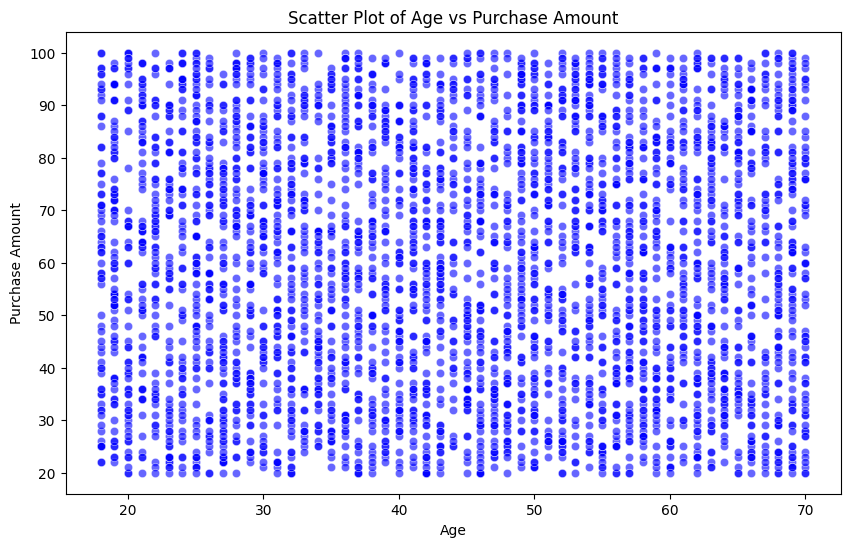

In [27]:
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df, color='blue', alpha=0.6)  # Membuat scatter plot
plt.title('Scatter Plot of Age vs Purchase Amount')  # Menambahkan judul
plt.xlabel('Age')  # Menambahkan label sumbu x
plt.ylabel('Purchase Amount')  # Menambahkan label sumbu y
plt.show()  # Menampilkan plot

In [34]:
print(df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


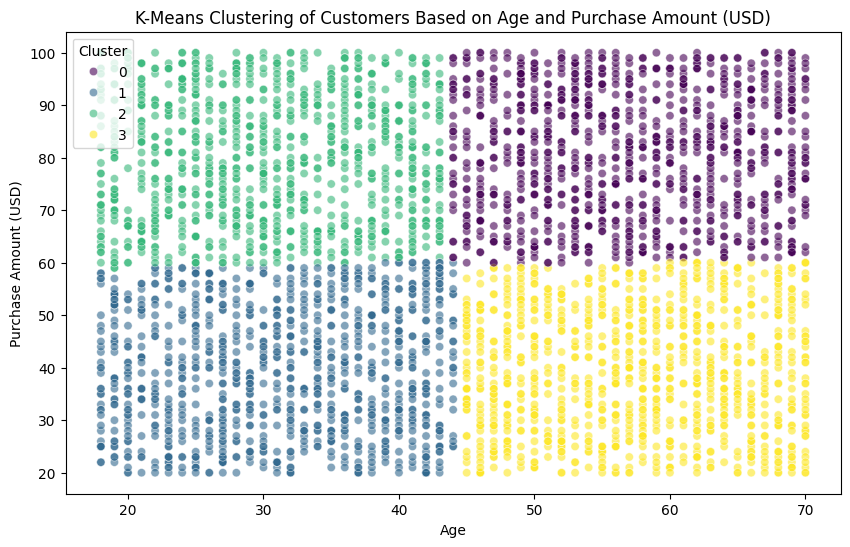

In [39]:
# Mengambil fitur yang relevan
data = df[['Age','Purchase Amount (USD)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=4, random_state=42)  # Misalkan kita ingin 4 cluster
kmeans.fit(data_scaled)

# Menambahkan label cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Cluster', data=df, palette='viridis', alpha=0.6)
plt.title('K-Means Clustering of Customers Based on Age and Purchase Amount (USD)')  # Menambahkan judul
plt.xlabel('Age')  # Menambahkan label sumbu x
plt.ylabel('Purchase Amount (USD)')  # Menambahkan label sumbu y
plt.legend(title='Cluster')
plt.show()  # Menampilkan plot

Correlation between Previous Purchases and Purchase Amount (USD): 0.01


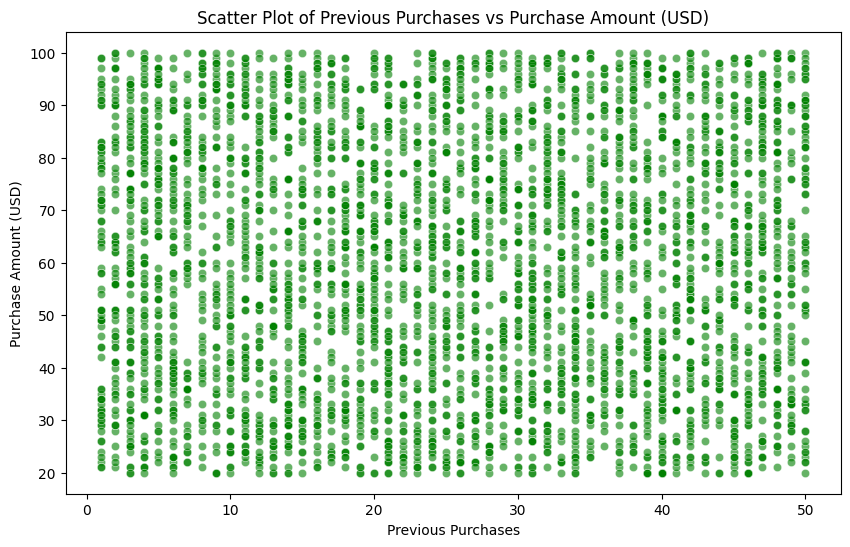

In [41]:
# Menghitung koefisien korelasi
correlation = df['Previous Purchases'].corr(df['Purchase Amount (USD)'])
print(f'Correlation between Previous Purchases and Purchase Amount (USD): {correlation:.2f}')

# Membuat scatter plot untuk visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df, color='green', alpha=0.6)
plt.title('Scatter Plot of Previous Purchases vs Purchase Amount (USD)')  # Menambahkan judul
plt.xlabel('Previous Purchases')  # Menambahkan label sumbu x
plt.ylabel('Purchase Amount (USD)')  # Menambahkan label sumbu y
plt.show()  # Menampilkan plot

<ipython-input-42-64f0d5f4aaf6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols[i]], ax=axs[i])
<ipython-input-42-64f0d5f4aaf6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols[i]], ax=axs[i])
<ipython-input-42-64f0d5f4aaf6>:5: UserWarning: 

`distplot` is a deprecated function 

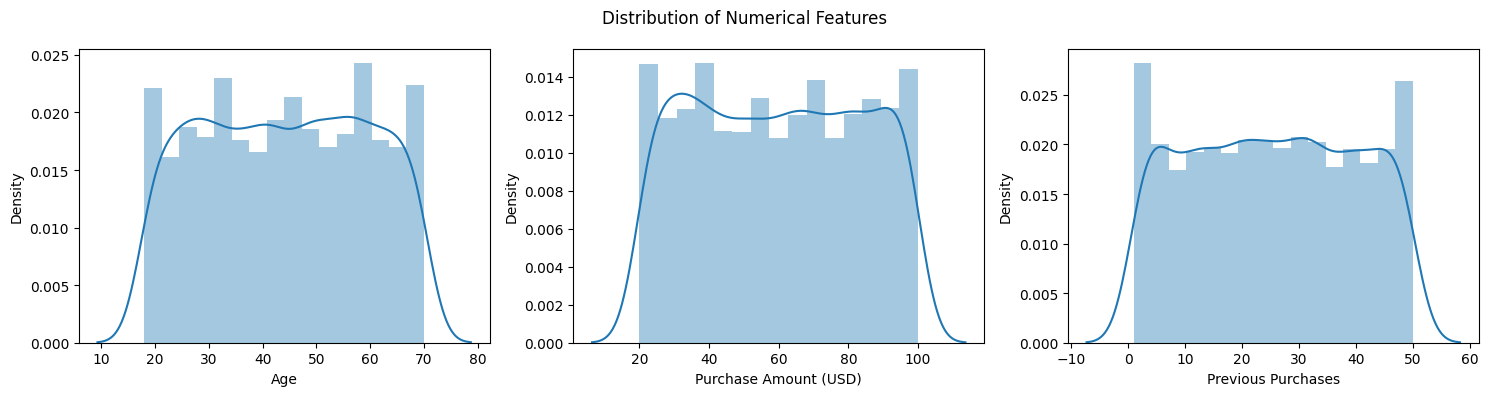

In [42]:
# Distribution of numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
for i in range(len(cols)):
    sns.distplot(df[cols[i]], ax=axs[i])
fig.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

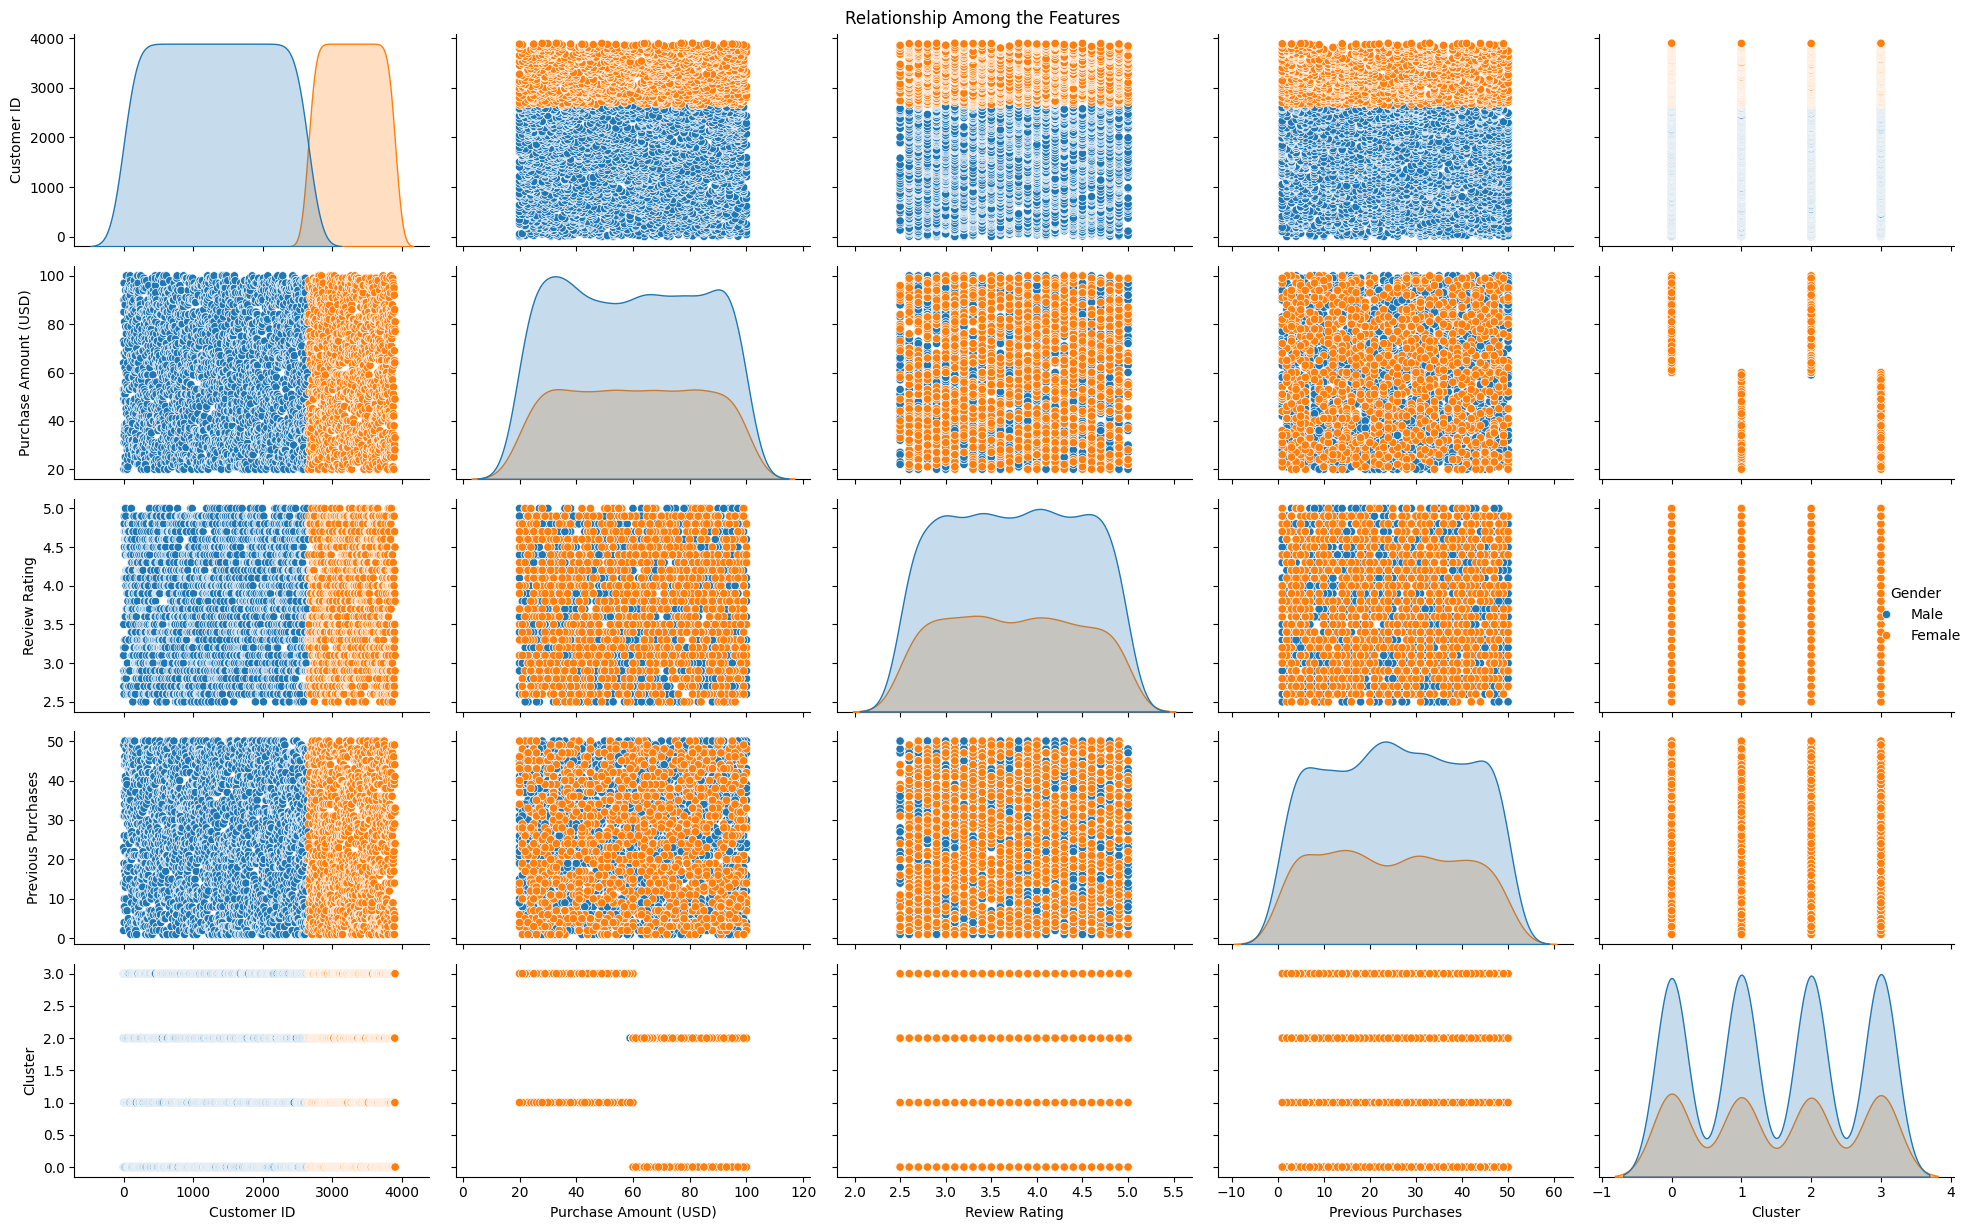

In [44]:
# Relationship among the features
sns.pairplot(df.drop('Age', axis=1), hue='Gender', aspect=1.5)
plt.suptitle('Relationship Among the Features')
plt.tight_layout()
plt.show()

In [49]:
# Feature Selection
df_fs = df.drop(columns='Age')

# Label Encoding
df_encoded = df_fs.replace({'Gender': {'Female':0, 'Male':1}})

# Feature Scaling
#scaler = MinMaxScaler()
#X = scaler.fit_transform(df_encoded)
X = df_encoded

<ipython-input-49-fb4810540240>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_fs.replace({'Gender': {'Female':0, 'Male':1}})


In [52]:
# Cek tipe data dalam X
print(X.dtypes)

# Cek apakah ada kolom non-numerik
print(X.select_dtypes(include=['object']).head())

Customer ID                   int64
Gender                        int64
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
Cluster                       int32
dtype: object
  Item Purchased  Category       Location Size      Color  Season  \
0         Blouse  Clothing       Kentucky    L       Gray  Winter   
1        Sweater  Clothing          Maine    L     Maroon  Winter   
2          Jeans  Clothing  Massachusetts    S     Maroon  Spring   
3        Sandals  Footwear

In [53]:
from sklearn.preprocessing import LabelEncoder

# Mengonversi semua kolom kategorikal ke numerik
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

In [54]:
print(X.dtypes)

Customer ID                   int64
Gender                        int64
Item Purchased                int64
Category                      int64
Purchase Amount (USD)         int64
Location                      int64
Size                          int64
Color                         int64
Season                        int64
Review Rating               float64
Subscription Status           int64
Payment Method                int64
Shipping Type                 int64
Discount Applied              int64
Promo Code Used               int64
Previous Purchases            int64
Preferred Payment Method      int64
Frequency of Purchases        int64
Cluster                       int32
dtype: object


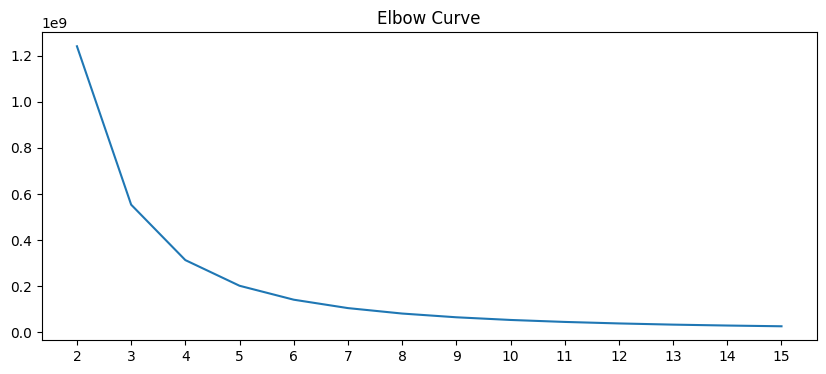

In [55]:
# Elbow Method to identify optimum no. of clusters
inertia = []
range_of_clusters = list(range(2, 16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Labeling the data
df_kmeans = df.copy()
df_kmeans['Cluster'] = kmeans.labels_
print(df_kmeans.head())

# Calculate the Silhouette Score
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

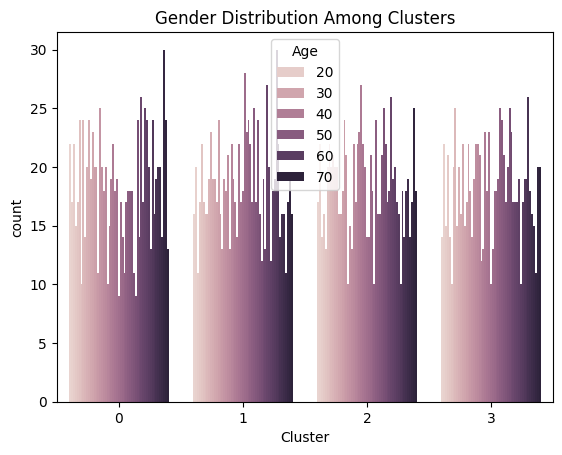

In [59]:
# Categorical variable distribution among clusters
sns.countplot(data=df_kmeans, x='Cluster', hue='Age')
plt.title('Gender Distribution Among Clusters')
plt.show()

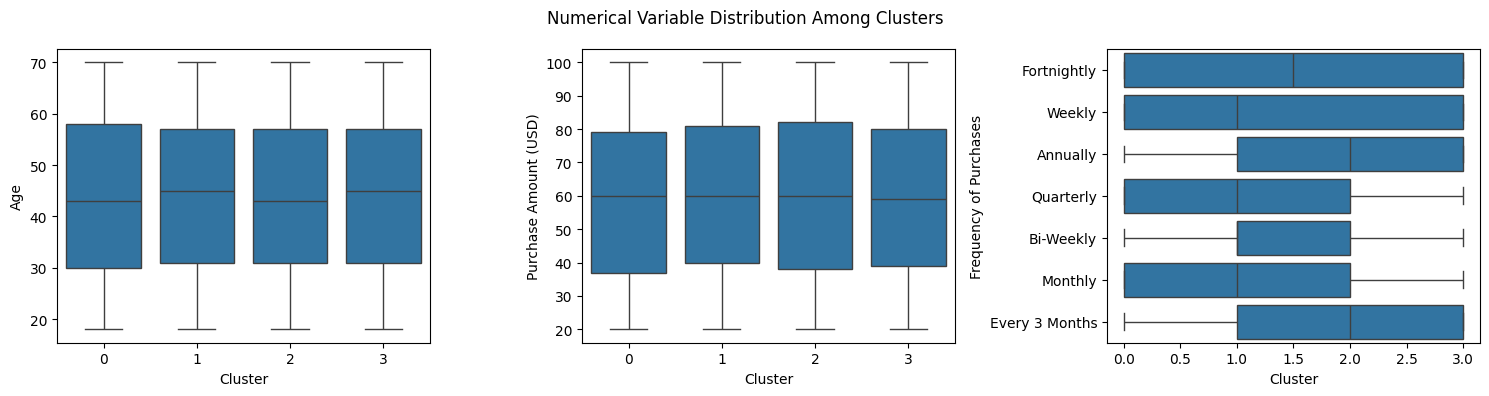

In [60]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Purchase Amount (USD)', 'Frequency of Purchases']
for i in range(len(cols)):
    sns.boxplot(data=df_kmeans, x='Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()